*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0-dev20210429


In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2021-04-29 11:55:30--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.4’

train-data.tsv.4    100%[===================>] 349.84K  1.90MB/s    in 0.2s    

2021-04-29 11:55:30 (1.90 MB/s) - ‘train-data.tsv.4’ saved [358233/358233]

--2021-04-29 11:55:30--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.4’

valid-data.tsv.4    100%[========

In [ ]:
# Pandas dataframe
train_df = pd.read_csv(train_file_path, sep ='\t',names=["label", "message"])
test_df = pd.read_csv(test_file_path, sep ='\t',names=["label", "message"])
train_df.head()

,label,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [ ]:
# Summary statistics - train
train_df.describe()

,label,message
count,4179,4179
unique,2,3935
top,ham,"sorry, i'll call later"
freq,3619,22


# Prepare train/test data and pre-process text

In [ ]:
# Convert the text label to numeric - Map ham label as 0 and spam as 1
train_df['msg_type']= train_df['label'].map({'ham': 0, 'spam': 1})
train_df.tail(5)

,label,message,msg_type
4174,ham,just woke up. yeesh its late. but i didn't fal...,0
4175,ham,what do u reckon as need 2 arrange transport i...,0
4176,spam,free entry into our £250 weekly competition ju...,1
4177,spam,-pls stop bootydelious (32/f) is inviting you ...,1
4178,ham,tell my bad character which u dnt lik in me. ...,0


In [ ]:
# Convert the text label to numeric - Map ham label as 0 and spam as 1
test_df['msg_type']= test_df['label'].map({'ham': 0, 'spam': 1})
test_df.tail(5)

,label,message,msg_type
1387,ham,true dear..i sat to pray evening and felt so.s...,0
1388,ham,"what will we do in the shower, baby?",0
1389,ham,where are you ? what are you doing ? are yuou ...,0
1390,spam,ur cash-balance is currently 500 pounds - to m...,1
1391,spam,not heard from u4 a while. call 4 rude chat pr...,1


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenization
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 1000

tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_df["message"])

In [ ]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'you': 4,
 'a': 5,
 'the': 6,
 'u': 7,
 'and': 8,
 'in': 9,
 'is': 10,
 'me': 11,
 'my': 12,
 'for': 13,
 'your': 14,
 'it': 15,
 'of': 16,
 'call': 17,
 'have': 18,
 'on': 19,
 'now': 20,
 'that': 21,
 '2': 22,
 'are': 23,
 'so': 24,
 'but': 25,
 'not': 26,
 'or': 27,
 'do': 28,
 'at': 29,
 'can': 30,
 "i'm": 31,
 'will': 32,
 'be': 33,
 'with': 34,
 'if': 35,
 'get': 36,
 'just': 37,
 'ur': 38,
 'no': 39,
 'this': 40,
 'we': 41,
 '4': 42,
 'gt': 43,
 'lt': 44,
 'up': 45,
 'ok': 46,
 'go': 47,
 'free': 48,
 'when': 49,
 'how': 50,
 'out': 51,
 'all': 52,
 'from': 53,
 'what': 54,
 'know': 55,
 'like': 56,
 'then': 57,
 'good': 58,
 'got': 59,
 'come': 60,
 'its': 61,
 'time': 62,
 'day': 63,
 'only': 64,
 'am': 65,
 'was': 66,
 'he': 67,
 'love': 68,
 'send': 69,
 'there': 70,
 'as': 71,
 'text': 72,
 'txt': 73,
 'want': 74,
 'going': 75,
 'one': 76,
 'by': 77,
 'ü': 78,
 'about': 79,
 'need': 80,
 'still': 81,
 'lor': 82,
 'n': 83,
 'r': 84,
 "i'll": 

In [ ]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 7693 unique tokens in training data. 


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_df["message"])
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_df["message"])
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [ ]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (4179, 50)
Shape of testing tensor:  (1392, 50)


In [ ]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(32, 5)

In [ ]:
# After padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [ ]:
print(training_padded[0])

[  1  37   1  45 143   5 402 767  79   7 726  24   2  94  56   7 163  20
   2 461  55 177  79   1 111  25   2 315 154  45  13  15   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [ ]:
# Dense Spam Detection Model
vocab_size = 1000 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 32

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the Dense model
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
train_labels = train_df['msg_type'].values
test_labels = test_df['msg_type'].values

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# fitting a dense spam detector model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
131/131 - 1s - loss: 0.5068 - accuracy: 0.8650 - val_loss: 0.3363 - val_accuracy: 0.8657
Epoch 2/30
131/131 - 0s - loss: 0.2948 - accuracy: 0.8658 - val_loss: 0.2429 - val_accuracy: 0.8664
Epoch 3/30
131/131 - 0s - loss: 0.1886 - accuracy: 0.9189 - val_loss: 0.1390 - val_accuracy: 0.9648
Epoch 4/30
131/131 - 0s - loss: 0.1097 - accuracy: 0.9675 - val_loss: 0.0905 - val_accuracy: 0.9734
Epoch 5/30
131/131 - 0s - loss: 0.0746 - accuracy: 0.9777 - val_loss: 0.0692 - val_accuracy: 0.9763
Epoch 6/30
131/131 - 0s - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0593 - val_accuracy: 0.9784
Epoch 7/30
131/131 - 0s - loss: 0.0483 - accuracy: 0.9840 - val_loss: 0.0537 - val_accuracy: 0.9799
Epoch 8/30
131/131 - 0s - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0501 - val_accuracy: 0.9806
Epoch 9/30
131/131 - 0s - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0477 - val_accuracy: 0.9842
Epoch 10/30
131/131 - 0s - loss: 0.0333 - accuracy: 0.9902 - val_loss: 0.0462 - val_accuracy: 0.9842

In [ ]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)

44/44 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9871


[0.04499832168221474, 0.9870689511299133]

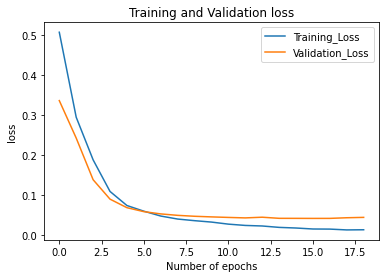

In [ ]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

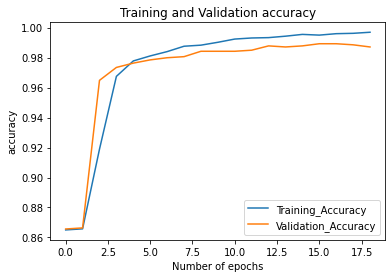

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  new_seq = tokenizer.texts_to_sequences([pred_text])
  padded = pad_sequences(new_seq, maxlen =max_len,
                    padding = padding_type,
                    truncating=trunc_type)
  prediction = model.predict(padded)
  #print(prediction)
  if np.round_(prediction, decimals = 2) < 0.5:
    prediction = "ham"
  else:
    prediction = "spam"
  return (prediction)

#pred_text = "how are you doing today?"
pred_text ="sale today! to stop texts call 98912460324"
prediction = predict_message(pred_text)
print(prediction)

spam


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
